In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 17.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd

100%|██████████| 6.25M/6.25M [00:00<00:00, 82.1MB/s]



image 1/1 /content/drive/MyDrive/Colab Notebooks/data/car_img.jpg: 384x640 2 persons, 11 cars, 3 motorcycles, 1 truck, 340.9ms
Speed: 12.8ms preprocess, 340.9ms inference, 38.1ms postprocess per image at shape (1, 3, 384, 640)


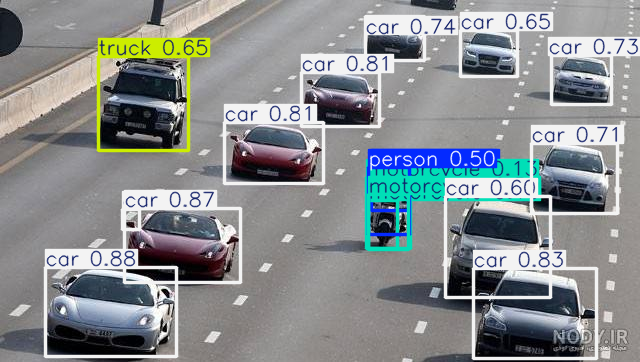

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

#مدل های یولو از قبل اموزش دیده شده اند
model= YOLO("yolov8n.pt")
            #ورژن مدل یولو

#متغییر اول عکس متغییر دوم درصد اطمینان متغیر سوم برای ذخیره عکس
res=model.predict("/content/drive/MyDrive/Colab Notebooks/data/car_img.jpg"
,conf=0.1,save=False)

res[0].plot()
res[0].show()

اگر درصد اطمینان رو پایین بدیم شاید یولو خوب تشخیص نده اگر هم درصد اطمینان رو بالا ببریم از اونور بوم میوفتیم و تشخیصش کمتر میشه

درصد اطمینان یک پارامتر بشدت مهمه و باید یک مقدار بهینه براش بگذاریم !!!
بسته به تسک هم میتونه بالا یا پایین باشه

بعضی وقتا ممکنه دو چیز هم پوشانی داشته باشن و مثلن دوتا انسان رو ی انسان تشخیص بده و این مشکل از کادره

#دسترسی به متغییر های یولو این کد جامع ترین کدشه

100%|██████████| 6.25M/6.25M [00:00<00:00, 95.7MB/s]



0: 384x640 1 person, 10 cars, 1 motorcycle, 1 truck, 199.5ms
Speed: 6.3ms preprocess, 199.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


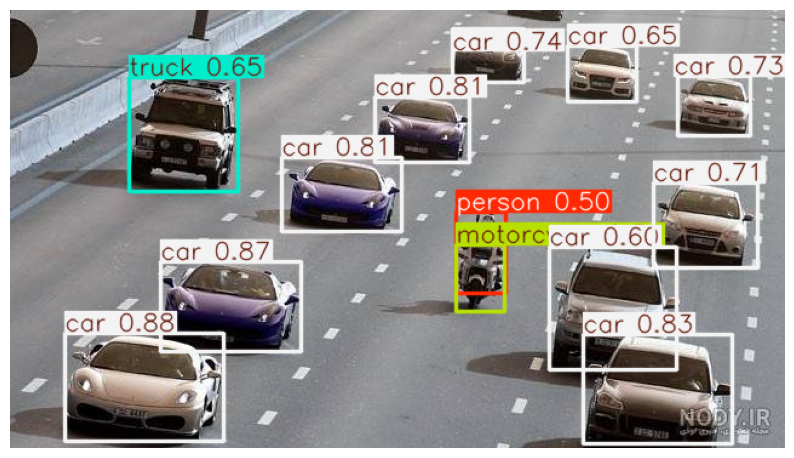

model parameters: 
input Image Shape : (362, 640, 3)
number of detected Objects: 13
object 1
 - Label: car
 - Confidence: 0.88
 - Bounding Box: x1=45 y1=267 x2=176 y2=356
object 2
 - Label: car
 - Confidence: 0.87
 - Bounding Box: x1=124 y1=208 x2=240 y2=282
object 3
 - Label: car
 - Confidence: 0.83
 - Bounding Box: x1=473 y1=268 x2=596 y2=358
object 4
 - Label: car
 - Confidence: 0.81
 - Bounding Box: x1=301 y1=72 x2=379 y2=126
object 5
 - Label: car
 - Confidence: 0.81
 - Bounding Box: x1=224 y1=122 x2=323 y2=183
object 6
 - Label: car
 - Confidence: 0.74
 - Bounding Box: x1=365 y1=16 x2=424 y2=60
object 7
 - Label: car
 - Confidence: 0.73
 - Bounding Box: x1=551 y1=55 x2=611 y2=104
object 8
 - Label: car
 - Confidence: 0.71
 - Bounding Box: x1=531 y1=143 x2=617 y2=213
object 9
 - Label: truck
 - Confidence: 0.65
 - Bounding Box: x1=98 y1=56 x2=188 y2=150
object 10
 - Label: car
 - Confidence: 0.65
 - Bounding Box: x1=460 y1=30 x2=517 y2=76
object 11
 - Label: car
 - Confidence: 0.6

In [ ]:
#import necessary libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

#load the YOLOv8 model(this download the pre-trained model)
model= YOLO("yolov8n.pt")  #using a smaller version (yolov8n) for faster performance


#read the image with OpenCv
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/car_img.jpg")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #convert the image from BGR To RGB for display

#perform inference (object detction)
results= model(image)

#ِdisplay the results with bounding boxes and labels
results_img=results[0].plot() #get the result image with boxes and labels

#plot the image using matplotlib
plt.figure(figsize=(10,10))
plt.imshow(results_img)
plt.axis('off')
plt.show()

#print some key parameters and results
print("model parameters: ")
print(f"input Image Shape : {image.shape}")
print(f"number of detected Objects: {len(results[0].boxes)}")

# Loop through the detected objects and display details
for i,box in enumerate(results[0].boxes):
  class_id= int(box.cls.item())   #convert the tensor to an integer
  confidence=box.conf.item()    #convert the tensor to a float
  label= model.names[class_id]  #get the class label
  x1,y1,x2,y2= map(int,box.xyxy[0].tolist())      #convert the coordinates to integers

  print(f"object {i+1}")
  print(f" - Label: {label}")
  print(f" - Confidence: {confidence:.2f}")
  print(f" - Bounding Box: x1={x1} y1={y1} x2={x2} y2={y2}")        #x1 y1 گوشه بالا سمت چپ
                                                                    #x2 y2 گوشه پایین سمت راست



بر اساس درصد اطمینان یولو میاد تشخیص میده
به ترتیب